In [76]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from fancyimpute import KNN

import matplotlib.pyplot as plt

import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [77]:
data=pd.read_excel('data.xls')

# Exploratory Data Analysis

In [78]:

data.columns=data.columns.str.replace('Work load Average/day ', "Work load Average per Day")

In [79]:
data['Month of absence']= data['Month of absence'].replace(0,np.nan)

In [80]:
data= data.drop(['ID'],axis=1)



In [81]:
data["Work load Average per Day"]=data["Work load Average per Day"].div(1000)

In [82]:
data.columns=data.columns.str.replace(' ','')

In [83]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex','Absenteeismtimeinhours']

cat=['Reasonforabsence','Monthofabsence','Dayoftheweek','Seasons','Disciplinaryfailure','Education','Son',
     'Socialdrinker','Socialsmoker','Pet']

# Missing Value Analysis

In [84]:
missing_values=pd.DataFrame(data.isnull().sum())

In [85]:
missing_values=missing_values.reset_index()

In [86]:
missing_values=missing_values.rename(columns= {'index': 'features', 0:'missing_percentage'})

In [87]:
missing_values['missing_percentage']=(missing_values['missing_percentage']/len(data)*100)

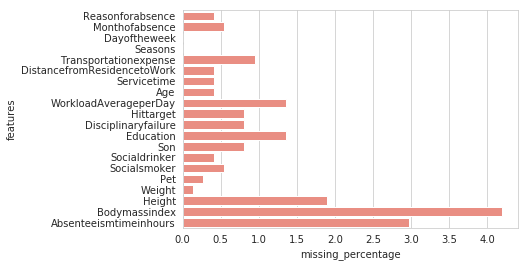

In [88]:
sns.barplot(x='missing_percentage',y='features',data=missing_values, color = 'salmon')
plt.show()

In [89]:
missing_values

,features,missing_percentage
0,Reasonforabsence,0.405405
1,Monthofabsence,0.540541
2,Dayoftheweek,0.000000
3,Seasons,0.000000
4,Transportationexpense,0.945946
5,DistancefromResidencetoWork,0.405405
6,Servicetime,0.405405
7,Age,0.405405
8,WorkloadAverageperDay,1.351351
9,Hittarget,0.810811


In [90]:
# Missing Value analysis for categorical variables
for i in cat:
    print(i)
    data[i] = data[i].fillna(data[i].mode()[0])
    

Reasonforabsence
Monthofabsence
Dayoftheweek
Seasons
Disciplinaryfailure
Education
Son
Socialdrinker
Socialsmoker
Pet


In [91]:
data=pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)


Imputing row 1/740 with 0 missing, elapsed time: 0.148
Imputing row 101/740 with 1 missing, elapsed time: 0.150
Imputing row 201/740 with 0 missing, elapsed time: 0.151
Imputing row 301/740 with 0 missing, elapsed time: 0.151
Imputing row 401/740 with 0 missing, elapsed time: 0.152
Imputing row 501/740 with 0 missing, elapsed time: 0.152
Imputing row 601/740 with 0 missing, elapsed time: 0.153
Imputing row 701/740 with 0 missing, elapsed time: 0.153


# Outlier Analysis

In [92]:

#Load Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Transportationexpense


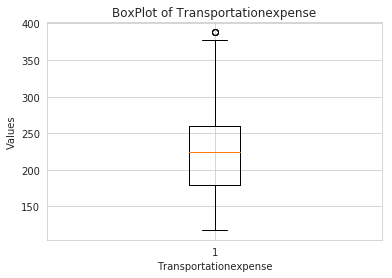

DistancefromResidencetoWork


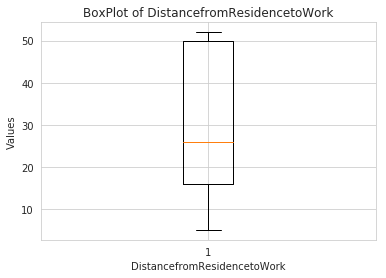

Servicetime


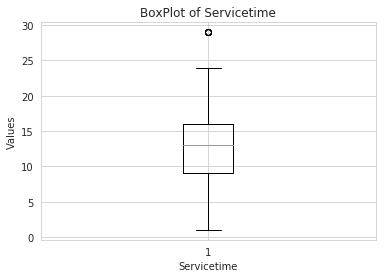

Age


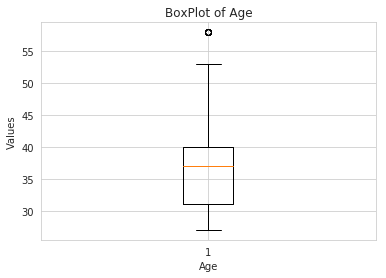

WorkloadAverageperDay


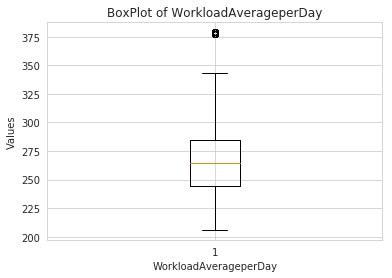

Hittarget


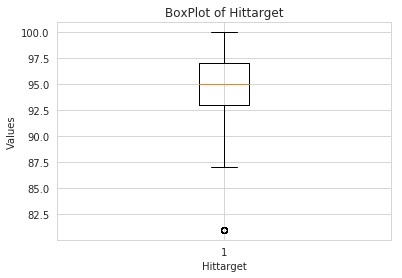

Weight


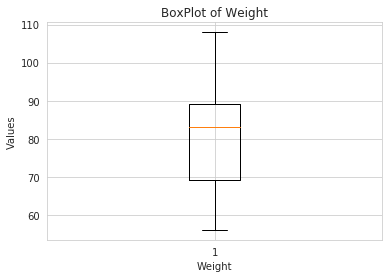

Height


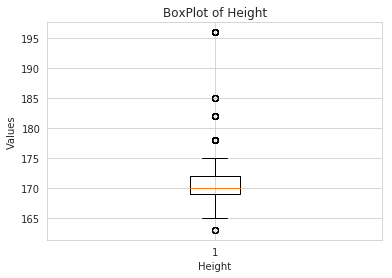

Bodymassindex


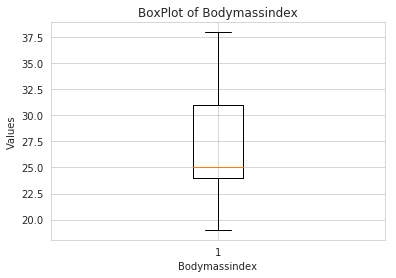

Absenteeismtimeinhours


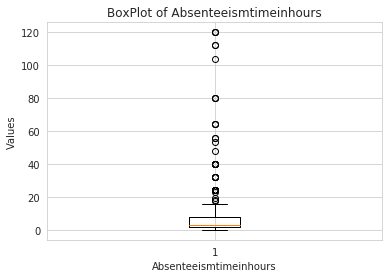

In [93]:
for i in num:
    print(i)
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()

In [94]:
for i in num:
    q75, q25 = np.percentile(data[i], [75,25]) 
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    data.loc[data[i]< minimum,i] = np.nan
    data.loc[data[i]> maximum,i] = np.nan
    

In [95]:
data.isna().sum()

Reasonforabsence                 0
Monthofabsence                   0
Dayoftheweek                     0
Seasons                          0
Transportationexpense            3
DistancefromResidencetoWork      0
Servicetime                      5
Age                              8
WorkloadAverageperDay           31
Hittarget                       19
Disciplinaryfailure              0
Education                        0
Son                              0
Socialdrinker                    0
Socialsmoker                     0
Pet                              0
Weight                           0
Height                         119
Bodymassindex                    0
Absenteeismtimeinhours          48
dtype: int64

In [96]:
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.142
Imputing row 101/740 with 1 missing, elapsed time: 0.143
Imputing row 201/740 with 0 missing, elapsed time: 0.144
Imputing row 301/740 with 0 missing, elapsed time: 0.146
Imputing row 401/740 with 0 missing, elapsed time: 0.147
Imputing row 501/740 with 0 missing, elapsed time: 0.148
Imputing row 601/740 with 0 missing, elapsed time: 0.148
Imputing row 701/740 with 0 missing, elapsed time: 0.150


# Distribution of the data

Reasonforabsence


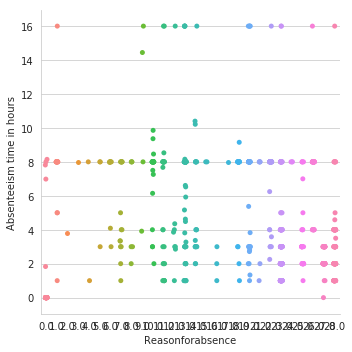

Monthofabsence


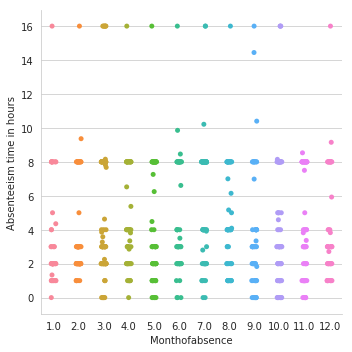

Dayoftheweek


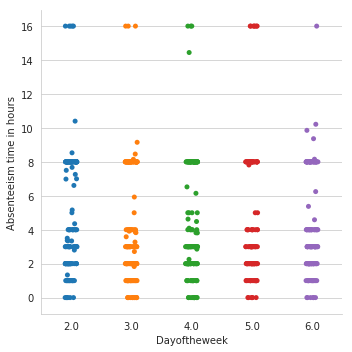

Seasons


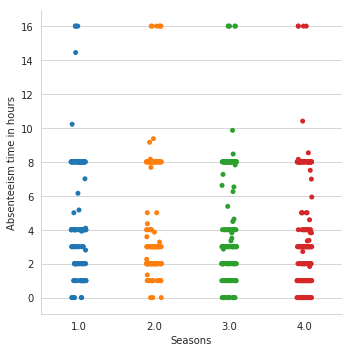

Disciplinaryfailure


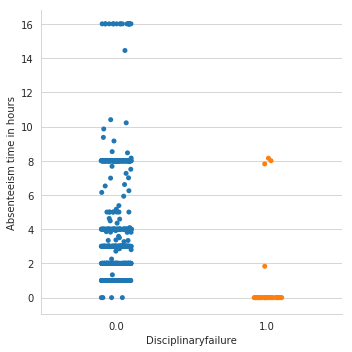

Education


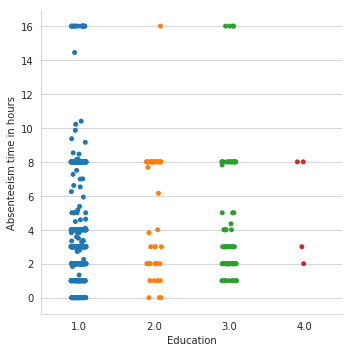

Son


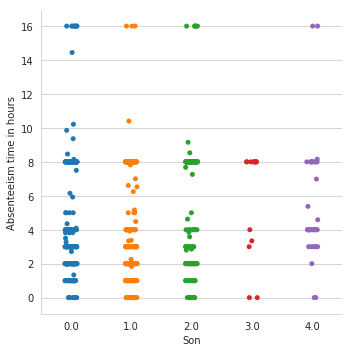

Socialdrinker


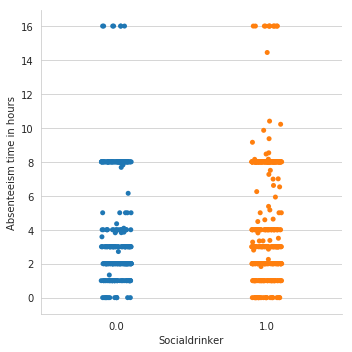

Socialsmoker


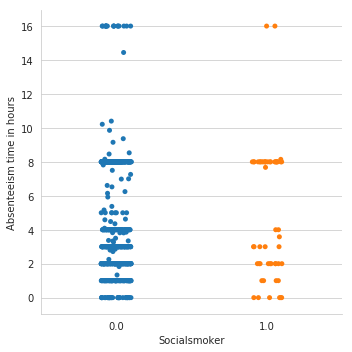

Pet


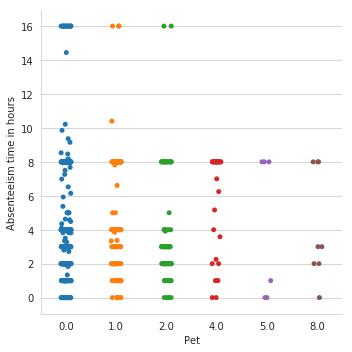

In [114]:
for i in cat:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=data)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()


Transportationexpense


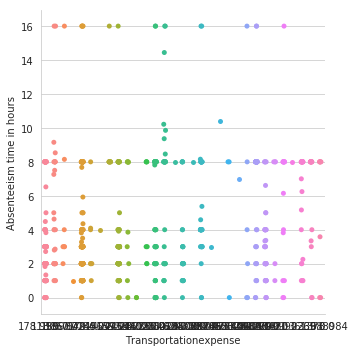

DistancefromResidencetoWork


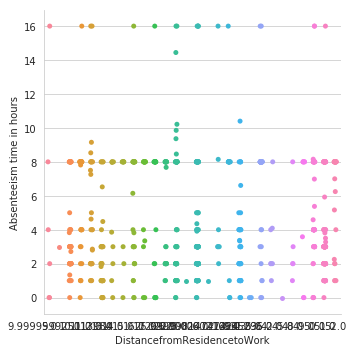

Servicetime


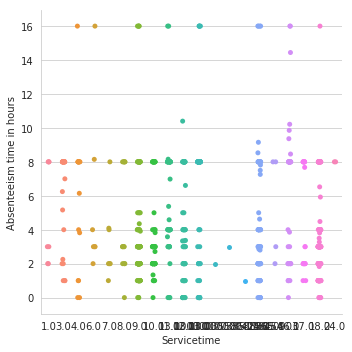

Age


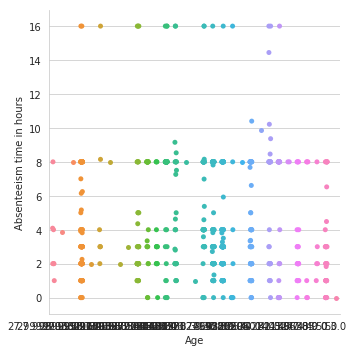

WorkloadAverageperDay


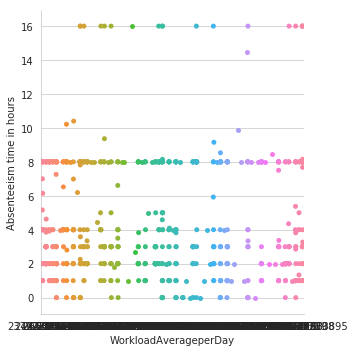

Hittarget


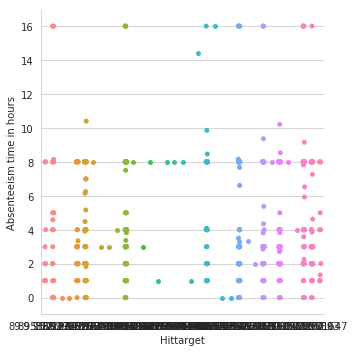

Weight


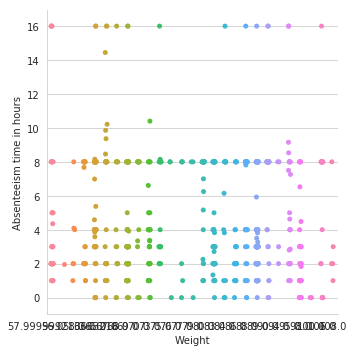

Height


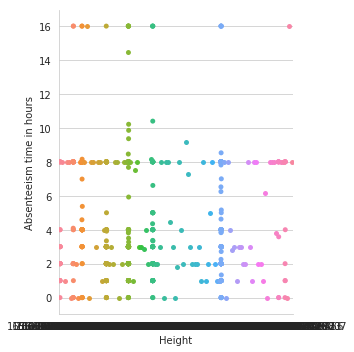

Bodymassindex


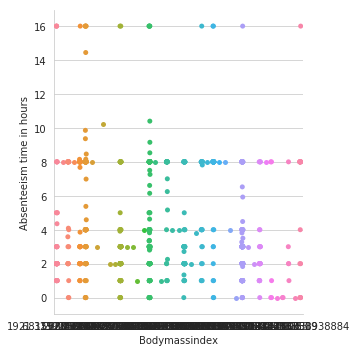

Absenteeismtimeinhours


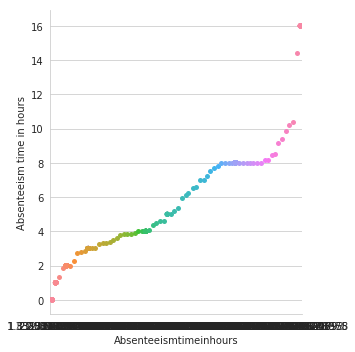

In [115]:
for i in num:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=data)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()

In [25]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex']

In [26]:
import matplotlib.pyplot as plt

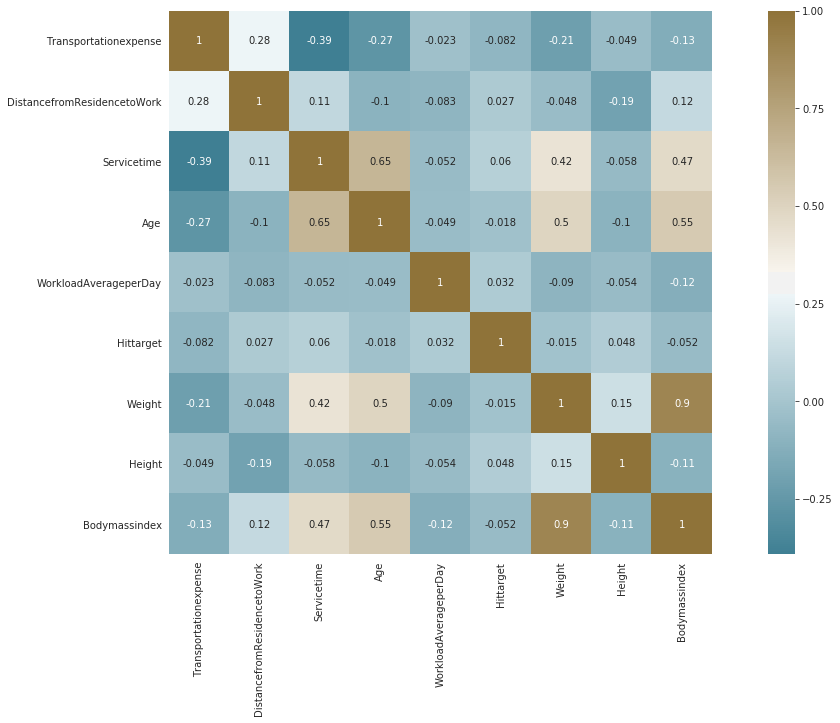

In [27]:
#Build Correlation Plot

data_corr=data.loc[:,num]
f, ax = plt.subplots(figsize=(20, 10))
corr = data_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 60, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.show()

#  ANOVA Test

In [28]:
from statsmodels import *
from statsmodels.formula.api import ols
from scipy import *
from statsmodels.stats.anova import anova_lm

In [29]:
from scipy import stats

In [30]:
formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)  '


In [31]:
model = ols(formula, data=data).fit()

In [32]:
aov_table = anova_lm(model, typ=2)

In [33]:
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),37.648813,3.0,1.812171,1.435738e-01
C(Monthofabsence),85.352996,11.0,1.120457,3.418676e-01
C(Pet),61.877766,5.0,1.787038,1.132650e-01
C(Son),111.927376,4.0,4.040597,3.023878e-03
C(Socialdrinker),64.040599,1.0,9.247505,2.448953e-03
C(Reasonforabsence),2338.928454,27.0,12.508994,1.073539e-43
C(Dayoftheweek),15.194311,4.0,0.548517,7.001729e-01
C(Disciplinaryfailure),6.123839,1.0,0.884287,3.473647e-01
C(Education),38.709719,3.0,1.863236,1.344578e-01
C(Socialsmoker),0.511332,1.0,0.073837,7.859130e-01


In [34]:
data = data.drop(["Education","Seasons","Pet","Socialsmoker","Weight","Monthofabsence"],axis=1)

In [35]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Bodymassindex','Absenteeismtimeinhours','Height']

cat=['Reasonforabsence','Dayoftheweek','Son','Disciplinaryfailure','Socialdrinker']

# Feature Scaling

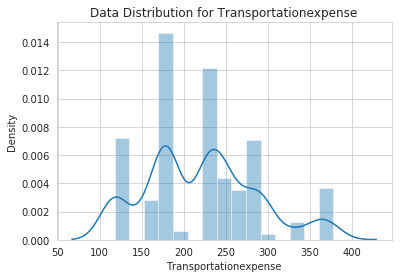

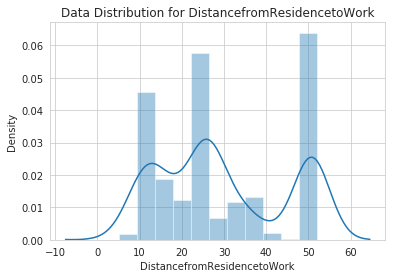

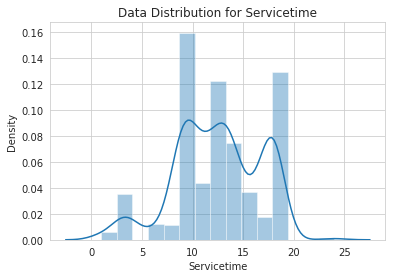

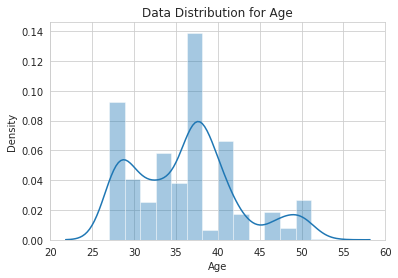

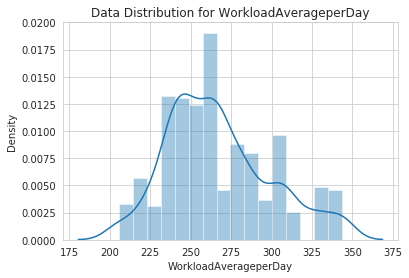

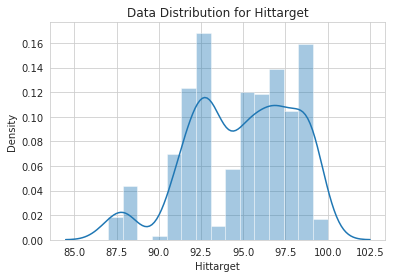

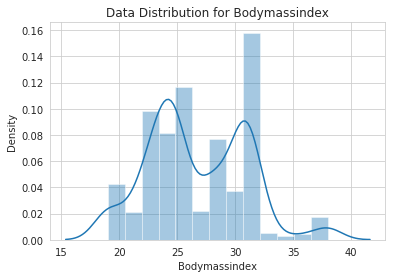

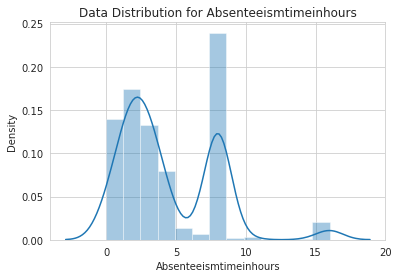

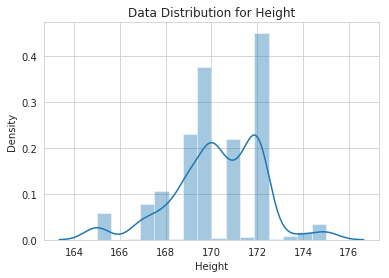

In [36]:
#First Check distribution of Data

for i in num:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Data Distribution for "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

In [37]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
data['Absenteeismtimeinhours'] = np.log1p(data['Absenteeismtimeinhours'])

In [38]:
#Normalization
for i in num:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverageperDay
Hittarget
Bodymassindex
Absenteeismtimeinhours
Height


In [39]:
data.describe()

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.204054,3.914865,0.394832,0.524066,0.497650,0.351893,0.443972,0.608543,0.052703,1.009459,0.568919,0.526764,0.404599,0.525339
std,8.423836,1.421675,0.254271,0.315676,0.181293,0.235029,0.233210,0.237602,0.223590,1.094292,0.495562,0.194085,0.225250,0.232853
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,0.387762
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,0.489301
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,0.775524
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [52]:
data = pd.get_dummies(data,columns=cat)

X= data.drop(['Absenteeismtimeinhours'],axis=1)
Y= data['Absenteeismtimeinhours']

#Divide data into train and test-
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.25)



KeyError: "None of [Index(['Reasonforabsence', 'Dayoftheweek', 'Son', 'Disciplinaryfailure',\n       'Socialdrinker'],\n      dtype='object')] are in the [columns]"

In [51]:
def MAE(actual,predicted):
    mae=mean_squared_error(actual,predicted)
    return mae

In [42]:
def RMSE(actual,predicted):
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse

# Decision Tree


In [53]:

DT_Model = DecisionTreeRegressor(random_state = 1).fit(X_train,Y_train)

DT_Model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [54]:
DT_predict = DT_Model.predict(X_test)
DT_predict = pd.DataFrame(DT_predict)

In [55]:

MAE_DT=MAE(Y_test,DT_predict)
RMSE_DT=RMSE(Y_test,DT_predict)
R2_DT=r2_score(Y_test,DT_predict)

print(RMSE_DT,MAE_DT,R2_DT)

0.21948084521641645 0.04817184141691255 0.18392790030573036


In [56]:
## RMSE : 0.2191078
## MAE:   0.048331886
## R2 Score :  0.18352315

# Random Forest

In [57]:
Rf_model=RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

In [58]:
Rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
Rf_predict=Rf_model.predict(X_test)

In [60]:
RMSE_RF=RMSE(Y_test,Rf_predict)


MAE_RF=MAE(Y_test,Rf_predict)


R2_RF=r2_score(Y_test,Rf_predict)
print(RMSE_RF,MAE_RF,R2_RF)

0.18620977047286866 0.03467407861955843 0.4125915200307735


In [61]:
## RMSE:   0.18655826
## MAE:      0.03462693
## R2 Score:   0.412840

In [62]:
Rf_model.feature_importances_

array([8.49142123e-02, 1.67118533e-02, 2.11595630e-02, 3.53259722e-02,
       8.30002001e-02, 5.75066026e-02, 5.07798842e-02, 3.68495314e-02,
       2.14480152e-01, 3.02268472e-03, 7.86795521e-04, 1.09937244e-04,
       1.45433910e-03, 1.29913304e-03, 2.51344002e-03, 7.16697544e-03,
       1.50048092e-03, 1.34986291e-03, 3.94868841e-03, 1.45113814e-02,
       6.01601093e-03, 9.69547055e-03, 2.76185253e-03, 1.50711305e-04,
       2.86976505e-03, 3.04694811e-04, 1.12231913e-02, 7.65050779e-03,
       1.00698697e-03, 5.39566314e-03, 7.05611313e-02, 7.53347102e-06,
       1.50134221e-02, 4.57540809e-03, 3.55836422e-02, 7.19377960e-02,
       9.87179589e-03, 9.07627834e-03, 1.23819979e-02, 1.27520451e-02,
       1.57236904e-02, 3.91733721e-03, 5.84346924e-03, 8.46632210e-03,
       1.40998473e-03, 8.02213362e-04, 1.54266282e-02, 8.02529176e-03,
       7.30309885e-03, 5.85436967e-03])

# Linear Regression

In [63]:
import statsmodels.api as sm

In [64]:
LR_model=sm.OLS(Y_train,X_train).fit()

In [65]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Absenteeismtimeinhours   R-squared:                       0.568
Model:                                OLS   Adj. R-squared:                  0.530
Method:                     Least Squares   F-statistic:                     14.86
Date:                    Fri, 21 Jun 2019   Prob (F-statistic):           6.08e-67
Time:                            22:47:53   Log-Likelihood:                 263.43
No. Observations:                     555   AIC:                            -434.9
Df Residuals:                         509   BIC:                            -236.2
Df Model:                              45                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Transportationexpense           0.1389      0.043      3.231      0.001       0.054       0.223
DistancefromResidencetoWork    -0.0587      0.036     -1.647      0.100      -0.129       0.011
Servicetime                     0.1399      0.068      2.070      0.039       0.007       0.273
Age                            -0.1300      0.049     -2.663      0.008      -0.226      -0.034
WorkloadAverageperDay          -0.0572      0.030     -1.897      0.058      -0.116       0.002
Hittarget                      -0.0502      0.030     -1.685      0.093      -0.109       0.008
Height                         -0.0191      0.040     -0.478      0.633      -0.097       0.059
Bodymassindex                   0.0156      0.043      0.361      0.718      -0.069       0.101
Reasonforabsence_0.0           -0.5013      0.110     -4.545      0.000      -0.718      -0.285
Reasonforabsence_1.0            0.1088      0.048      2.274      0.023       0.015       0.203
Reasonforabsence_2.0           -0.0941      0.156     -0.604      0.546      -0.400       0.212
Reasonforabsence_3.0            0.2514      0.155      1.622      0.105      -0.053       0.556
Reasonforabsence_4.0           -0.0928      0.112     -0.832      0.406      -0.312       0.126
Reasonforabsence_5.0            0.0798      0.110      0.726      0.468      -0.136       0.296
Reasonforabsence_6.0            0.0984      0.060      1.632      0.103      -0.020       0.217
Reasonforabsence_7.0            0.0191      0.047      0.403      0.687      -0.074       0.112
Reasonforabsence_8.0           -0.0041      0.079     -0.053      0.958      -0.159       0.151
Reasonforabsence_9.0            0.1520      0.110      1.388      0.166      -0.063       0.367
Reasonforabsence_10.0           0.1124      0.044      2.563      0.011       0.026       0.199
Reasonforabsence_11.0           0.0295      0.039      0.750      0.454      -0.048       0.107
Reasonforabsence_12.0           0.0644      0.079      0.817      0.415      -0.090       0.219
Reasonforabsence_13.0           0.0502      0.028      1.768      0.078      -0.006       0.106
Reasonforabsence_14.0           0.0534      0.046      1.150      0.251      -0.038       0.145
Reasonforabsence_15.0           0.1252      0.110      1.135      0.257      -0.092       0.342
Reasonforabsence_16.0          -0.2710      0.111     -2.437      0.015      -0.489      -0.052
Reasonforabsence_17.0           0.2196      0.155      1.412      0.159      -0.086       0.525
Reasonforabsence_18.0           0.1125      0.043      2.624      0.009       0.028       0.197
Reasonforabsence_19.0           0.0810      0.031      2.642      0.008       0.021       0.141
Reasonforabsence_21.0           0.0656      0.090      0.729   

In [66]:
LR_predict=LR_model.predict(X_test)

In [67]:
RMSE_LR=RMSE(Y_test,LR_predict)


MAE_LR=MAE(Y_test,LR_predict)


R2_LR=r2_score(Y_test,LR_predict)
print(RMSE_RF,MAE_RF,R2_RF)

0.18620977047286866 0.03467407861955843 0.4125915200307735


In [68]:
##  RMSE:  0.18755826
## MAE :    0.0345269
## R2 Score:   0.41284

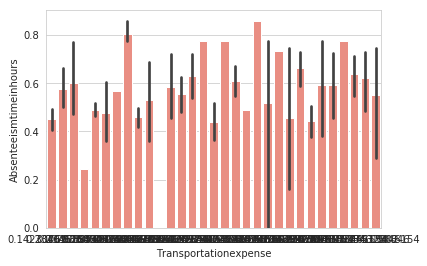

In [73]:
sns.barplot(x='Transportationexpense',y='Absenteeismtimeinhours',data=data, color = 'salmon')
plt.show()

In [74]:
sns.catplot(x='Reasonforabsence', y="Absenteeismtimeinhours", data=data)

ValueError: Could not interpret input 'Reasonforabsence'

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 51 columns):
Transportationexpense          740 non-null float64
DistancefromResidencetoWork    740 non-null float64
Servicetime                    740 non-null float64
Age                            740 non-null float64
WorkloadAverageperDay          740 non-null float64
Hittarget                      740 non-null float64
Height                         740 non-null float64
Bodymassindex                  740 non-null float64
Absenteeismtimeinhours         740 non-null float64
Reasonforabsence_0.0           740 non-null uint8
Reasonforabsence_1.0           740 non-null uint8
Reasonforabsence_2.0           740 non-null uint8
Reasonforabsence_3.0           740 non-null uint8
Reasonforabsence_4.0           740 non-null uint8
Reasonforabsence_5.0           740 non-null uint8
Reasonforabsence_6.0           740 non-null uint8
Reasonforabsence_7.0           740 non-null uint8
Reasonforabsence_8.0       